In [409]:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [410]:
results = {}

# Roaring
file_path = '../replication-package/common/resultData.pickle'
with open(file_path, 'rb') as file:
    results["common"] = pickle.load(file)

# VictoriaMetrics
file_path = '../replication-package/victoriaMetrics/resultData.pickle'
with open(file_path, 'rb') as file:
    results["victoria"] = pickle.load(file)

# GoQuery
file_path = '../replication-package/goQuery/resultData.pickle'
with open(file_path, 'rb') as file:
    results["goQuery"] = pickle.load(file)

# Roaring
file_path = '../replication-package/roaring/resultData.pickle'
with open(file_path, 'rb') as file:
    results["roaring"] = pickle.load(file)

In [411]:
order_keys = ['common', 'goQuery', 'roaring', 'victoria']

# Suite Reduction

In [ ]:
edge vs node coverage, project nodes vs all nodes

# Stability

In [315]:
import seaborn as sns
from matplotlib.ticker import ScalarFormatter
sns.set_theme()
from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 

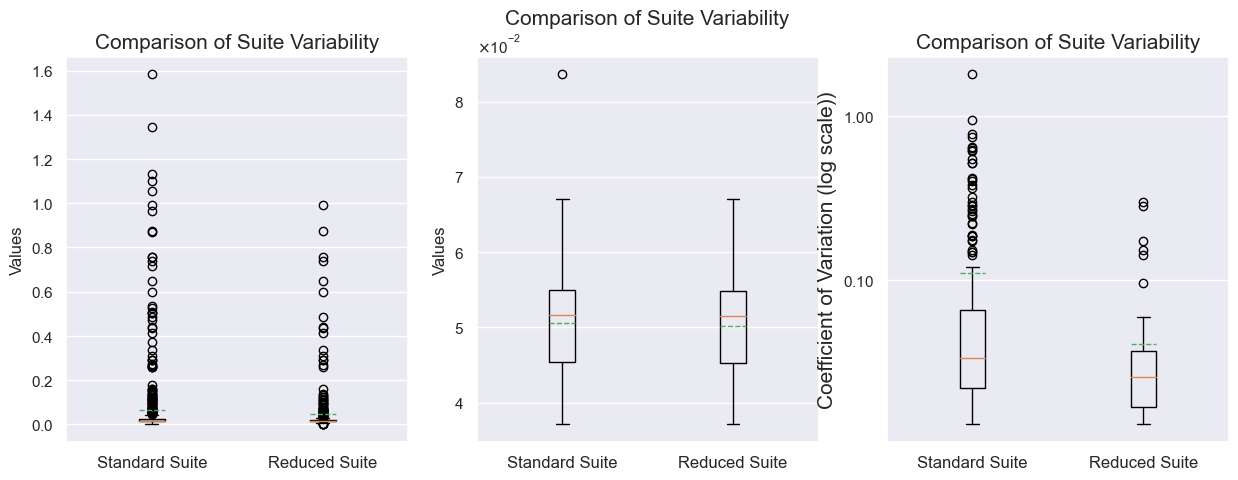

In [14]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for res in results:
    ax = axs[list(results.keys()).index(res)]
    data = [results[res]['stability_old'], results[res]['stability_new']]
    
    boxplot = ax.boxplot(data, positions=[1, 2], showmeans=True, meanline=True) #, labels=['Standard Suite', 'Reduced Suite'])
    ax.set_xticklabels(['Standard Suite', 'Reduced Suite'], fontsize=12)
    ax.set_ylabel('Values')
    ax.set_title('Comparison of Suite Variability', fontsize=15)

    ax.grid(axis='x', alpha=0.00)
    plt.ylabel('Coefficient of Variation (log scale))', fontsize=15)
    plt.yscale('log')
    ax.yaxis.set_major_formatter(formatter) 

# plt.savefig('graphics/all_stability.png', dpi=300, bbox_inches='tight')
plt.show()

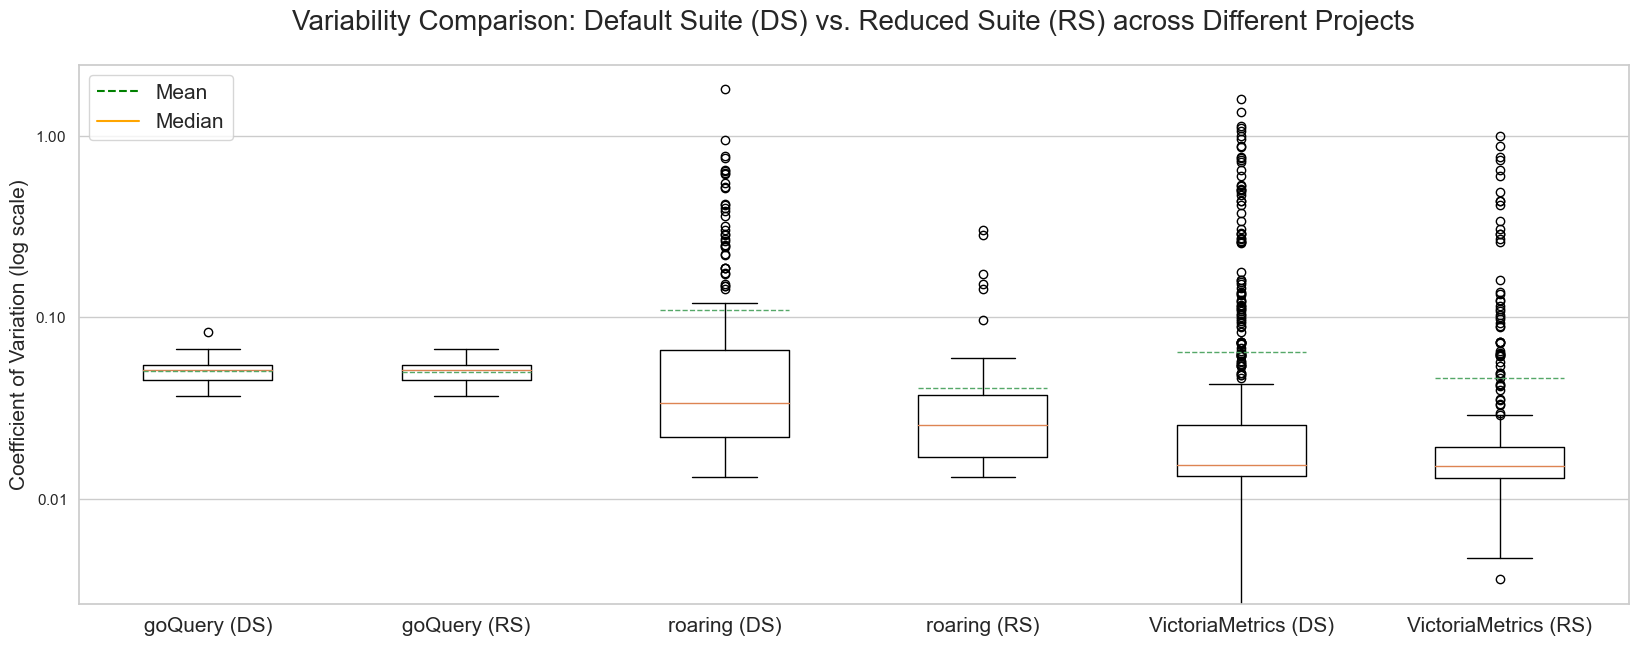

In [71]:
sns.set_theme(style="whitegrid")

fontsize = 20
title="Variability Comparison: Default Suite (DS) vs. Reduced Suite (RS) across Different Projects"
order_keys = ['goQuery', 'roaring', 'victoria']
labels = ['goQuery (DS)', 'goQuery (RS)', 'roaring (DS)', 'roaring (RS)', 'VictoriaMetrics (DS)', 'VictoriaMetrics (RS)']

data_all = []
for key in order_keys:
    data_all.extend([results[key]['stability_old'], results[key]['stability_new']])

fig, ax = plt.subplots(figsize=(20, 7))
boxplot = ax.boxplot(data_all, positions=list(range(len(data_all))), showmeans=True, meanline=True)
ax.set_xticklabels(labels, fontsize=fontsize -5) #, fontweight='bold')
ax.set_ylabel('Values')
ax.set_title(title, fontsize=fontsize, pad=25)
ax.grid(axis='x', alpha=0.00)

# Add custom elements for median and mean to legend
median_line = plt.Line2D([], [], color='green', linestyle='--', label='Mean')
mean_line = plt.Line2D([], [], color='orange', linestyle='-', label='Median')
plt.legend(handles=[median_line, mean_line], loc='upper left', fontsize=fontsize - 5)

plt.ylabel('Coefficient of Variation (log scale)', fontsize=fontsize -5)
plt.yscale('log')
ax.yaxis.set_major_formatter(formatter) 
plt.savefig('graphics/full_variability_all.png', dpi=300, bbox_inches='tight')
plt.show()

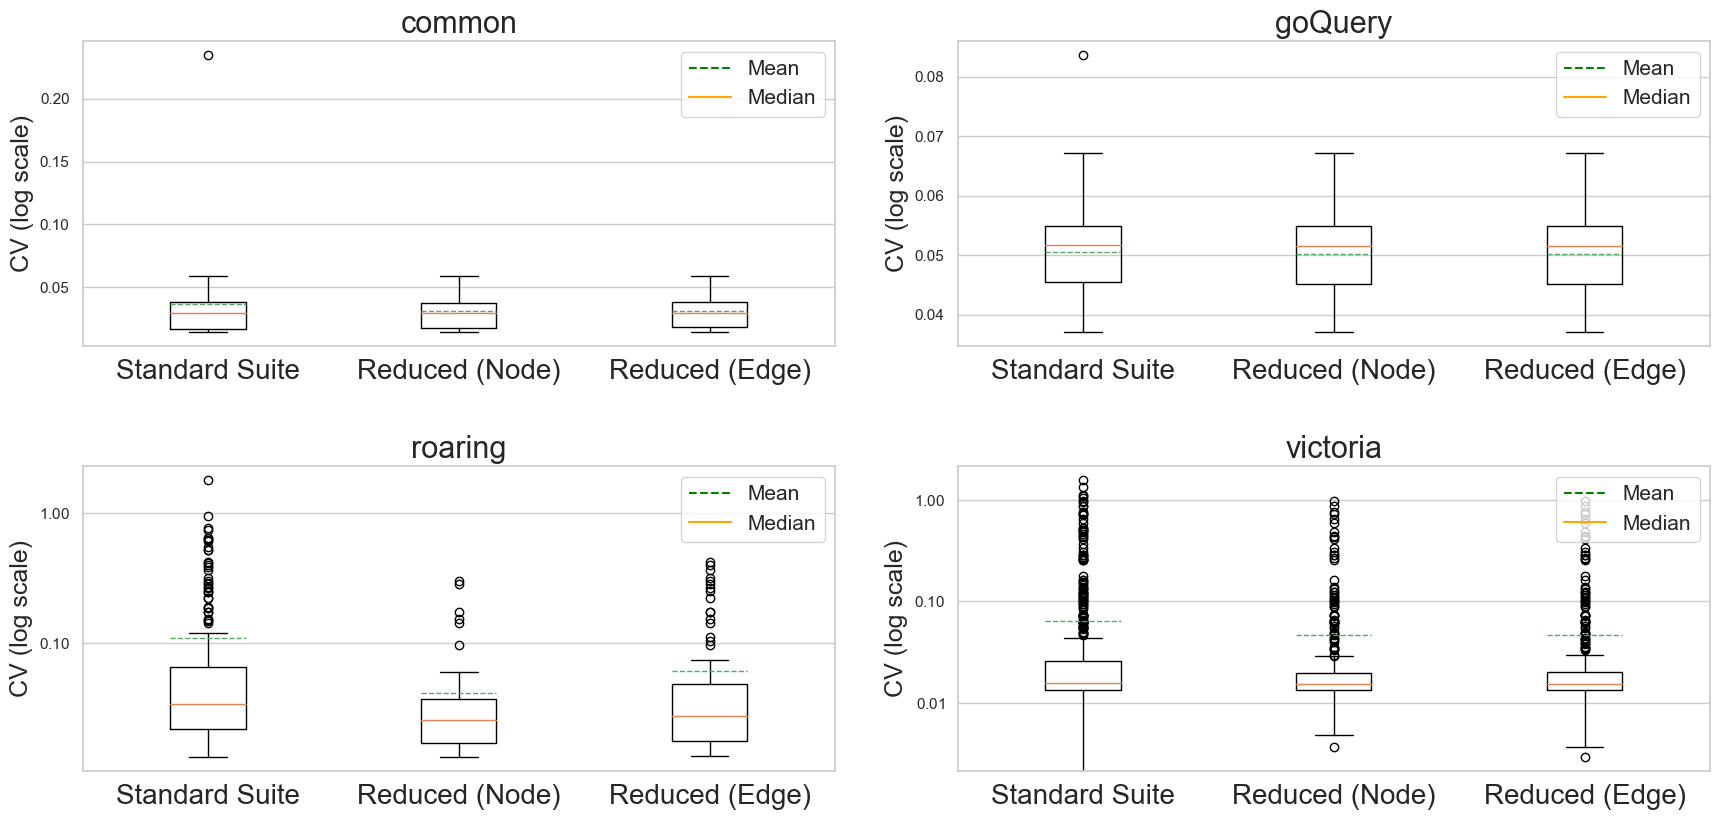

In [424]:
fig, axs = plt.subplots(2, 2, figsize=(18, 9))

# Add custom elements for median and mean to legend
median_line = plt.Line2D([], [], color='green', linestyle='--', label='Mean')
mean_line = plt.Line2D([], [], color='orange', linestyle='-', label='Median')

for i, res in enumerate(order_keys):
    row = i // 2
    col = i % 2
    ax = axs[row, col]

    ax.set_title(res, fontsize=22)

    data = [results[res]['stability_old'], results[res]['stabilities_new_nodes'], results[res]['stabilities_new_edges']]

    ax.boxplot(data, positions=[0, 1, 2], showmeans=True, meanline=True)
    ax.set_xticklabels(['Standard Suite', 'Reduced (Node)', 'Reduced (Edge)'], fontsize=fontsize)
    ax.grid(axis='x', alpha=0.00)

    ax.set_ylabel('CV (log scale)', fontsize=18)

    if row == 1:
        ax.set_yscale('log')
        ax.yaxis.set_major_formatter(formatter) 

    ax.legend(handles=[median_line, mean_line], loc='upper right', fontsize=fontsize - 5)
    
# increase padding between subplots
plt.tight_layout(pad=3.0)    

plt.savefig('graphics/full_variability_all.png', dpi=300, bbox_inches='tight')
plt.show()

/var/folders/j7/hj33vdfn4w3417fz56wp79600000gn/T/ipykernel_49292/2635856557.py:28: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 2)


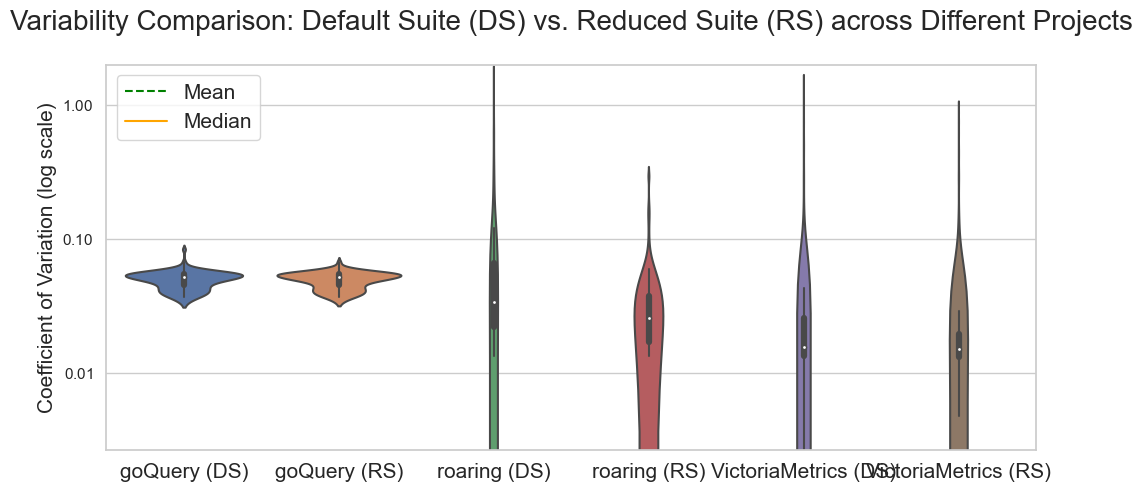

In [312]:
sns.set_theme(style="whitegrid")

fontsize = 20
title="Variability Comparison: Default Suite (DS) vs. Reduced Suite (RS) across Different Projects"
order_keys = ['goQuery', 'roaring', 'victoria']
labels = ['goQuery (DS)', 'goQuery (RS)', 'roaring (DS)', 'roaring (RS)', 'VictoriaMetrics (DS)', 'VictoriaMetrics (RS)']

data_all = []
for key in order_keys:
    data_all.extend([results[key]['stability_old'], results[key]['stability_new']])

fig, ax = plt.subplots(figsize=(12, 8))
boxplot = sns.violinplot(data_all, showmeans=True)

ax.set_xticks([0, 1, 2, 3, 4, 5])
ax.set_xticklabels(labels, fontsize=fontsize -5) #, fontweight='bold')
ax.set_ylabel('Values')
ax.set_title(title, fontsize=fontsize, pad=25)
ax.grid(axis='x', alpha=0.00)

# Add custom elements for median and mean to legend
median_line = plt.Line2D([], [], color='green', linestyle='--', label='Mean')
mean_line = plt.Line2D([], [], color='orange', linestyle='-', label='Median')
plt.legend(handles=[median_line, mean_line], loc='upper left', fontsize=fontsize - 5)

plt.ylabel('Coefficient of Variation (log scale)', fontsize=fontsize -5)
plt.yscale('log')
plt.ylim(0, 2)
plt.grid(True)

ax.yaxis.set_major_formatter(formatter) 
plt.savefig('graphics/full_variability_all.png', dpi=300, bbox_inches='tight')
plt.show()

# Variability

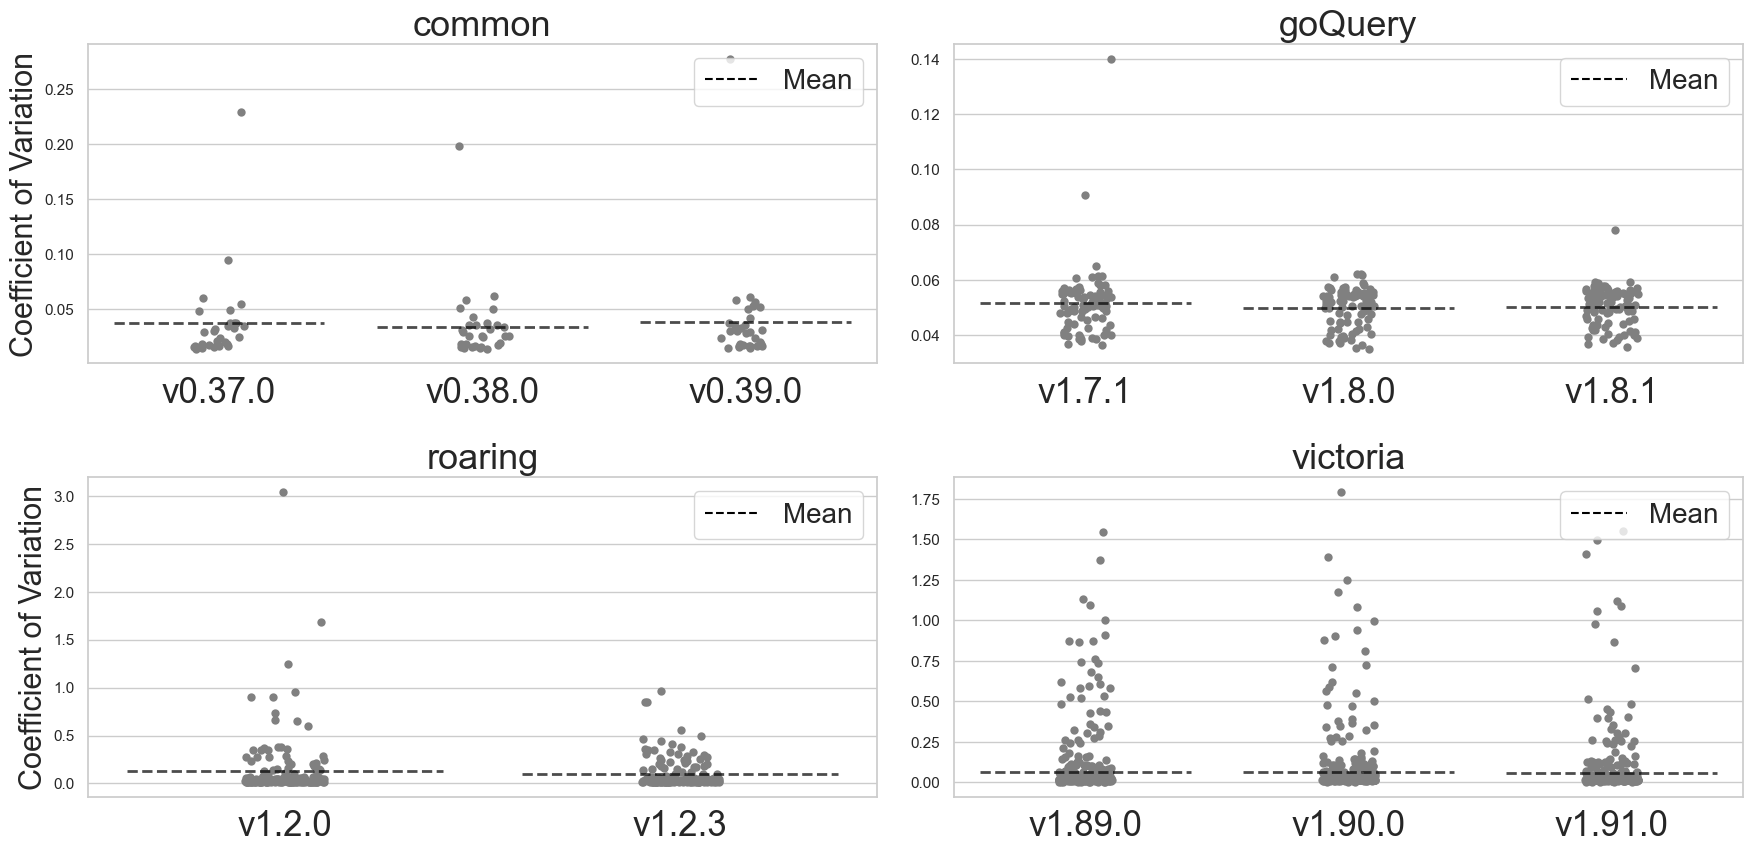

In [430]:
# get stability for all projects

fig, axs = plt.subplots(2, 2, figsize=(18, 9))

for i, res in enumerate(order_keys):
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    # ax = axs[order_keys.index(res)]


    data  = {'tag': [], 'coefficient of variation': [] }

    for idx, x in enumerate(results[res]["tags"]):
        # collect first value from all keys in stability measure dict
        cv = []
        for key in results[res]["stability_measures"]:
            try:
                cv.append(results[res]["stability_measures"][key][idx])
            except:
                # print("No measurement for " + key + " found")
                pass
                # cv.append(-1)

        data['tag'].extend([x] * len(cv))
        data['coefficient of variation'].extend(cv)

    data = pd.DataFrame(data)
    sns.stripplot(x='tag', y='coefficient of variation', data=data, size=6, color='grey', ax=ax)


    sns.boxplot(
        showmeans=True,
        meanline=True,
        palette="dark",
        meanprops={'color': 'black', 'ls': '--', 'lw': 2, 'alpha': 0.7},
        medianprops={'visible': False},
        whiskerprops={'visible': False},
        zorder=3,
        x='tag',
        y='coefficient of variation',
        data=data,
        showfliers=False,
        showbox=False,
        showcaps=False,
        ax=ax)

    ax.set_title(res, fontsize=26)
    ax.set_ylabel('')
    ax.set_xlabel('')
    if col == 0:
        ax.set_ylabel('Coefficient of Variation', fontsize=22)

    ax.set_xlabel('')

    # Increas x ticks font size
    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(25)

    # Legend
    mean_line = plt.Line2D([], [], color='black', linestyle='--', label='Mean')
    ax.legend(handles=[mean_line], loc='upper right', fontsize=20)

# increase padding between subplots
plt.tight_layout(pad=2.0)    

plt.savefig('graphics/all_cvs.png', dpi=300, bbox_inches='tight')
plt.show()
    

# Reduced Runtime

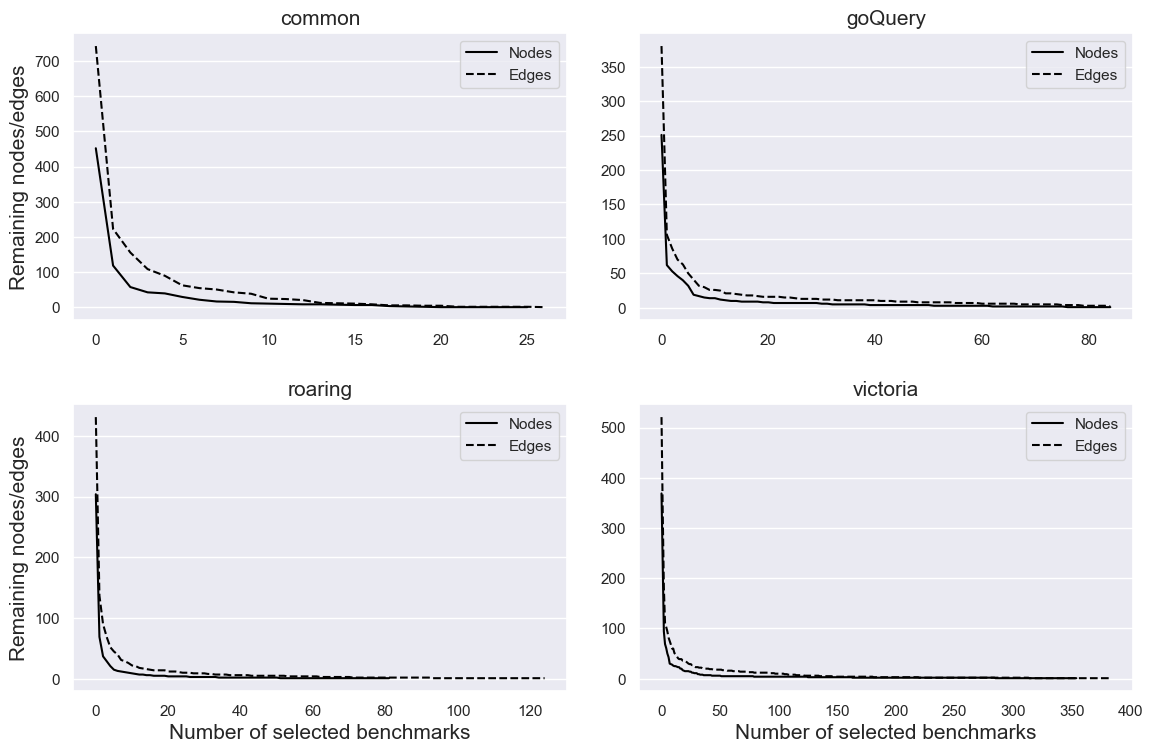

In [331]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

for i, res in enumerate(order_keys):
    row = i // 2
    col = i % 2
    ax = axs[row, col]

    ax.set_title(res, fontsize=15)

    # make grey scale
    ax.plot([x[1] for x in results[res]['reduce_graphs_nodes']], label="Nodes", color='black')
    ax.plot([x[1] for x in results[res]['reduce_graphs_edges']], label="Edges", linestyle='--', color='black')

    if col == 0:
        ax.set_ylabel("Remaining nodes/edges", fontsize=15)
    if row == 1:
        ax.set_xlabel("Number of selected benchmarks", fontsize=15)

    # remove vertical grid lines
    ax.grid(axis='x', alpha=0.00)

    ax.legend()
    
# increase padding between subplots
plt.tight_layout(pad=2.0)    

plt.savefig('graphics/all_reductions.png', dpi=300, bbox_inches='tight')
plt.show()

# Detecting Performance Changes

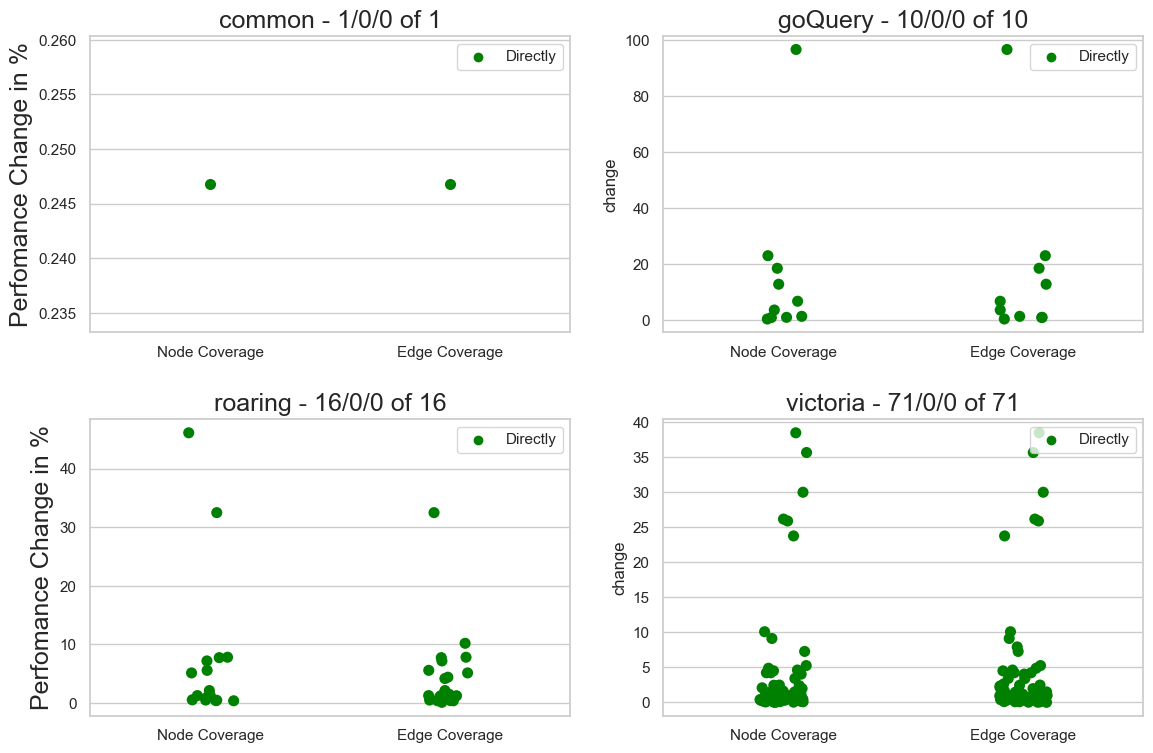

In [432]:
sns.set_theme(style="whitegrid")

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

for i, res in enumerate(order_keys):
    row = i // 2
    col = i % 2
    ax = axs[row, col]

    num_found_changes = len(results[res]['found_changes_nodes'])
    num_newly_found = len(results[res]['newly_found_nodes'])
    num_missing = len(results[res]['missing_nodes'])
    num_total = num_found_changes + num_newly_found + num_missing

    ax.set_title(f"{res} - {num_found_changes}/{num_newly_found}/{num_missing} of {num_total}", fontsize=18)

    data = {
        "change": [],
        "found": [],
        "suite": []
    }

    data['change'].extend(results[res]['found_changes_nodes'])
    data['found'].extend(['Directly'] * len(results[res]['found_changes_nodes']))
    data['suite'].extend(['Node Coverage'] * len(results[res]['found_changes_nodes']))

    data['change'].extend(results[res]['newly_found_nodes'])
    data['found'].extend(['Indirect'] * len(results[res]['newly_found_nodes']))
    data['suite'].extend(['Node Coverage'] * len(results[res]['newly_found_nodes']))

    #edges
    data['change'].extend(results[res]['found_changes_edges'])
    data['found'].extend(['Directly'] * len(results[res]['found_changes_edges']))
    data['suite'].extend(['Edge Coverage'] * len(results[res]['found_changes_edges']))

    data['change'].extend(results[res]['newly_found_edges'])
    data['found'].extend(['Indirect'] * len(results[res]['newly_found_edges']))
    data['suite'].extend(['Edge Coverage'] * len(results[res]['newly_found_edges']))

    # missed
    data['change'].extend(results[res]['missing_nodes'])
    data['found'].extend(['Missed'] * len(results[res]['missing_nodes']))
    data['suite'].extend(['Node Coverage'] * len(results[res]['missing_nodes']))

    data['change'].extend(results[res]['missing_edges'])
    data['found'].extend(['Missed'] * len(results[res]['missing_edges']))
    data['suite'].extend(['Edge Coverage'] * len(results[res]['missing_edges']))

    # hue color map for 3 different categories
    hue_colors = {
        'Directly': 'green',
        'Indirect': 'orange',
        'Missed': 'red'
    }

    sns.stripplot(data=data, y="change", x="suite", hue="found", ax=ax, size=8, dodge=True, color='grey', palette=hue_colors)

    if col == 0:
        ax.set_ylabel("Perfomance Change in %", fontsize=18)
    
    ax.set_xlabel("")
    ax.legend(loc='upper right', fontsize=11)

# increase padding between subplots
plt.tight_layout(pad=2.0)
plt.savefig('graphics/all_reductions.png', dpi=300, bbox_inches='tight')
plt.show()


<Axes: xlabel='suite', ylabel='change'>

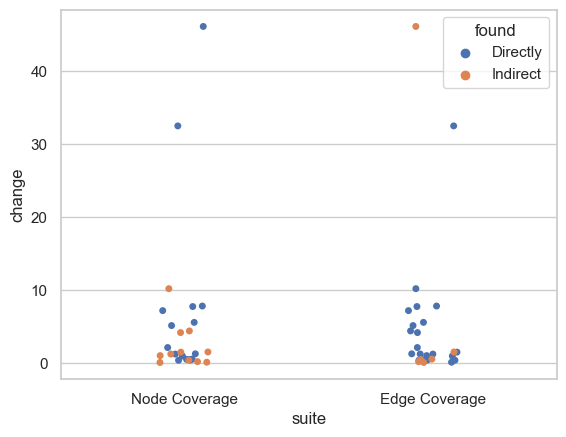

In [355]:
sns.set_theme(style="whitegrid")

data = {
    "change": [],
    "found": [],
    "suite": []
}

data['change'].extend(results['roaring']['found_changes_nodes'])
data['found'].extend(['Directly'] * len(results['roaring']['found_changes_nodes']))
data['suite'].extend(['Node Coverage'] * len(results['roaring']['found_changes_nodes']))

data['change'].extend(results['roaring']['newly_found_nodes'])
data['found'].extend(['Indirect'] * len(results['roaring']['newly_found_nodes']))
data['suite'].extend(['Node Coverage'] * len(results['roaring']['newly_found_nodes']))

#edges
data['change'].extend(results['roaring']['found_changes_edges'])
data['found'].extend(['Directly'] * len(results['roaring']['found_changes_edges']))
data['suite'].extend(['Edge Coverage'] * len(results['roaring']['found_changes_edges']))

data['change'].extend(results['roaring']['newly_found_edges'])
data['found'].extend(['Indirect'] * len(results['roaring']['newly_found_edges']))
data['suite'].extend(['Edge Coverage'] * len(results['roaring']['newly_found_edges']))

sns.stripplot(data=data, y="change", x="suite", hue="found")